In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Classification Of APIs using API Summaries

#### Ravi Sivaraman

In [ ]:
import pandas as pd
import yaml
import io



In [ ]:
base_path = "/content/drive/MyDrive/APIs/"
api_df = pd.read_csv("/content/drive/MyDrive/APIs/apis.csv")

In [ ]:
## TODO: rewrite it as get_n_tags()

def get_three_tags(tagslist):
    index = 0
    threetags = []
    for tag in range(0,3):
        try:
            item  = tagslist[tag]
            threetags.append(item)
        except IndexError:
            threetags.append('')
    return threetags



### Parse all APIs

In [ ]:
import re
apis = []
for index, row in api_df.iterrows():
    try:
        with open(base_path+row['API'], 'r') as stream:
            data_loaded = yaml.safe_load(stream)
            data_items =  list(data_loaded.keys())
            api_type = data_items[0]
            try:
                for key, val in data_loaded.items():
                    if key == "paths":
                        if api_type == "swagger":
                            for key2, val2 in val.items():
                                basePath = data_loaded["basePath"]
                                host = data_loaded["host"]
                                api_name = key2
                                api_http_type = list(val2.keys())[0]
                                api_summary = val2[api_http_type]['summary']
                                api_tags = val2[api_http_type]['tags']
                                api_row = [api_type,host,basePath,api_name,api_http_type,api_summary] + get_three_tags(api_tags)
                                api_summary_2 = ""
                                if api_summary:
                                    api_summary_2 = re.sub('\W+',' ', api_summary.lower() ) 
                                    if api_tags and type(api_tags) is list:
                                        api_summary_2 += " " + " ".join(api_tags)
                                        api_summary_2 =  api_summary_2.lower()

                                apis.append(api_row + ["".join(api_summary_2)] )
                        if api_type == "openapi":
                            api_name = list(val.keys())[0]
                            api_http_type = list(val[api_name].keys())[0]
                            api_summary = val[api_name][api_http_type]['summary']
                            api_tags = val[api_name][api_http_type]['tags']
                            api_row = [api_type,host,basePath,api_name,api_http_type,api_summary] + get_three_tags(api_tags)
                            api_summary_2 = ""
                            if api_summary:
                                api_summary_2 = re.sub('\W+',' ', api_summary.lower() ) 
                                if api_tags and type(api_tags) is list:
                                    api_summary_2 += " " + " ".join(api_tags)
                                    api_summary_2 = api_summary_2.lower()
                            apis.append(api_row + ["".join(api_summary_2)] )


            except Exception as e:
                continue
    except:
        continue
apis_df = pd.DataFrame.from_records(apis, columns=['api_type','host','basePath','api_name','api_http_type','api_summary','tag1', 'tag2', 'tag3', "api_summary_2"])


#Reference: https://towardsdatascience.com/how-to-cluster-similar-sentences-using-tf-idf-and-graph-partitioning-in-python-5fb70627a4e0


In [ ]:
def cosine_similarity(text1, text2):
    
    X_list = word_tokenize(text1) 
    Y_list = word_tokenize(text2)

    # sw contains the list of stopwords
    sw = stopwords.words('english') 
    l1 =[];l2 =[]

    # remove stop words from the string
    X_set = {w for w in X_list if not w in sw} 
    Y_set = {w for w in Y_list if not w in sw}

    # form a set containing keywords of both strings 
    rvector = X_set.union(Y_set) 
    for w in rvector:
        if w in X_set: l1.append(1) # create a vector
        else: l1.append(0)
        if w in Y_set: l2.append(1)
        else: l2.append(0)
    c = 0

    # cosine formula 
    for i in range(len(rvector)):
        c+= l1[i]*l2[i]
    cosine = c / float((sum(l1)*sum(l2))**0.5)
    return cosine



In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

stemmer = StemmerFactory().create_stemmer()
stopwords = StopWordRemoverFactory().get_stop_words()

def text_preprocess(series, stemmer, stopwords):
    df = series.str.replace("\n\t",  " ")
    df = df.str.replace(r"[^a-zA-Z ]+", "")
    df = df.str.lower()
    df = df.apply(lambda x: ' '.join([stemmer.stem(item) for item in x.split() if item not in stopwords]))
    return df

apis_df['processed_text'] = text_preprocess(apis_df['api_summary_2'], stemmer, stopwords)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':


In [ ]:
pip install fasttext

     |████████████████████████████████| 68 kB 5.4 MB/s 
  Using cached pybind11-2.9.2-py2.py3-none-any.whl (213 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3145013 sha256=459123c2a2c9d18f117f83763cfe00c7e8481a1edb99ab713e1d7ef624409a57
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [ ]:
apis_df

,api_type,host,basePath,api_name,api_http_type,api_summary,tag1,tag2,tag3,api_summary_2,processed_text
0,swagger,1forge.com,/forex-quotes,/quotes,get,Get quotes for all symbols,forex,finance,quotes,get quotes for all symbols forex finance quotes,get quotes for all symbols forex finance quotes
1,swagger,1forge.com,/forex-quotes,/symbols,get,Get a list of symbols for which we provide rea...,forex,finance,quotes,get a list of symbols for which we provide rea...,get a list of symbols for which we provide rea...
2,openapi,1forge.com,/forex-quotes,/api/auth/introspect,get,Performs introspection of the provided Bearer ...,auth,,,performs introspection of the provided bearer ...,performs introspection of the provided bearer ...
3,openapi,1forge.com,/forex-quotes,/activity,get,Retrieve a list of API Requests that have been...,Activity,,,retrieve a list of api requests that have been...,retrieve a list of api requests that have been...
4,openapi,1forge.com,/forex-quotes,/channels,get,Enumerate all active channels of the application,Status,,,enumerate all active channels of the applicati...,enumerate all active channels of the applicati...
...,...,...,...,...,...,...,...,...,...,...,...
3673,swagger,www.zoomconnect.com,/app,/api/rest/v1/voice/all,get,all,voice,,,all voice,all voice
3674,swagger,www.zoomconnect.com,/app,/api/rest/v1/voice/single-audio,post,single-audio,voice,,,single audio voice,single audio voice
3675,swagger,www.zoomconnect.com,/app,/api/rest/v1/voice/single-text,post,single-text,voice,,,single text voice,single text voice
3676,swagger,www.zoomconnect.com,/app,/api/rest/v1/voice/{messageId},delete,delete,voice,,,delete voice,delete voice


In [ ]:
import fasttext

In [ ]:
import fasttext

#model = fasttext.train_unsupervised('/Users/ravis/Downloads/wiki-news-300d-1M.vec')
apis_df['vec'] = apis_df['processed_text'].apply(lambda x: model.get_sentence_vector(x))

Read 301M words
Number of words:  18483
Number of labels: 0
Progress: 100.0% words/sec/thread:   43175 lr:  0.000000 avg.loss:  0.168916 ETA:   0h 0m 0s  9.1% words/sec/thread:   54861 lr:  0.045439 avg.loss:  1.319454 ETA:   0h46m19s 22.7% words/sec/thread:   55184 lr:  0.038633 avg.loss:  0.740638 ETA:   0h39m 9s 32.8% words/sec/thread:   55213 lr:  0.033620 avg.loss:  0.516682 ETA:   0h34m 3s 40.4% words/sec/thread:   30375 lr:  0.029793 avg.loss:  0.419499 ETA:   0h54m51s 44.1% words/sec/thread:   31583 lr:  0.027949 avg.loss:  0.383439 ETA:   0h49m29s  31977 lr:  0.027347 avg.loss:  0.372982 ETA:   0h47m49s 47.2% words/sec/thread:   32579 lr:  0.026412 avg.loss:  0.357725 ETA:   0h45m20s0.350543 ETA:   0h44m 6s 49.2% words/sec/thread:   33223 lr:  0.025395 avg.loss:  0.342618 ETA:   0h42m44s 51.2% words/sec/thread:   33830 lr:  0.024395 avg.loss:  0.328962 ETA:   0h40m19s 0.024002 avg.loss:  0.323916 ETA:   0h39m24s34448 lr:  0.023284 avg.loss:  0.315027 ETA:   0h37m48s 54.6% word

In [ ]:
apis_df['vec'] = apis_df['processed_text'].apply(lambda x: model.get_sentence_vector(x))

In [ ]:
apis_df['vec']

0       [0.031398054, 0.023552913, -0.007920066, 0.035...
1       [0.034627102, -0.0007058442, 0.014054417, 0.08...
2       [0.01872605, -0.003620591, -0.006981179, -0.00...
3       [-0.0044181463, -0.027002709, -0.005675698, -0...
4       [-0.0072438256, 0.017935228, 0.0035025962, -0....
                              ...                        
3673    [-0.015646573, -0.0004480447, -0.08189552, -0....
3674    [-0.020408006, -0.09452908, 0.097075306, -0.16...
3675    [-0.05634869, 0.03253364, -0.035542767, -0.129...
3676    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3677    [-0.17810443, 0.12271426, 0.030331822, -0.0779...
Name: vec, Length: 3678, dtype: object

In [ ]:
#model.save_model("apimodel.bin")

model = fasttext.load_model("apimodel.bin")

In [ ]:

X =apis_df['vec']

In [ ]:
df_x = pd.DataFrame.from_records(apis_df['vec'])

In [ ]:
X = df_x.values

k 2
k 3
k 4
k 5
k 6
k 7
k 8
k 9
k 10
k 11
k 12
k 13
k 14
k 15
k 16
k 17
k 18
k 19


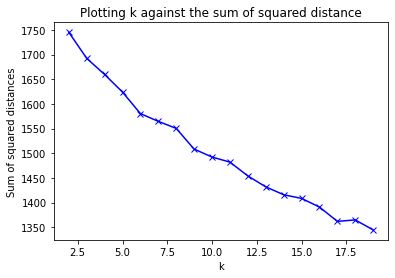

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
sum_of_squared_distances = []
K = range(2,20)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)
    print("k", k)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Plotting k against the sum of squared distance')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
k_val = 17
kmeans = KMeans(n_clusters=k_val)
apis_df['cluster'] = kmeans.fit_predict(apis_df['vec'].values.tolist())

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
apis_df['x'] = pca.fit_transform(apis_df['vec'].values.tolist())[:,0]
apis_df['y'] = pca.fit_transform(apis_df['vec'].values.tolist())[:,1]
apis_df['z'] = pca.fit_transform(apis_df['vec'].values.tolist())[:,2]

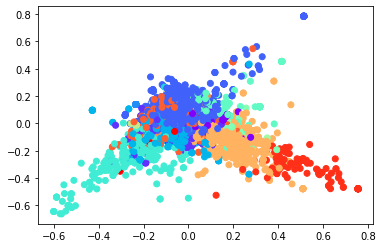

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(apis_df['x'], apis_df['y'], c=apis_df['cluster'], cmap='rainbow')

Text(0.5, 0.92, 'Tweet Clustering using K Means')

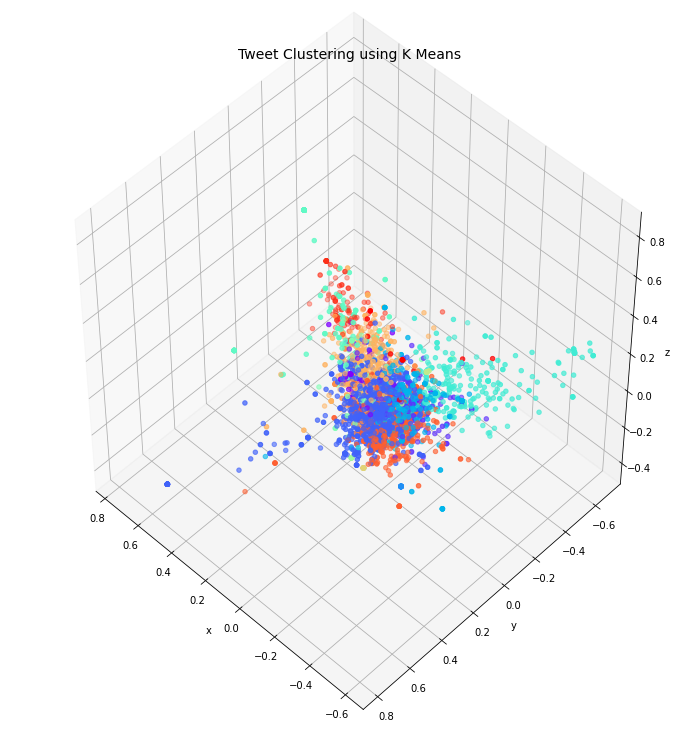

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(10,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(apis_df['x'],apis_df['y'],apis_df['z'], c=apis_df['cluster'], cmap='rainbow')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_facecolor('white')
plt.title("Tweet Clustering using K Means", fontsize=14)

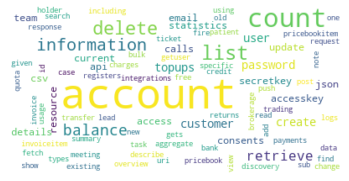

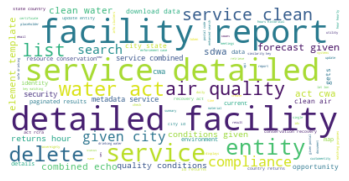

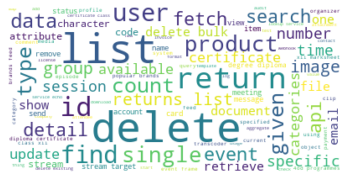

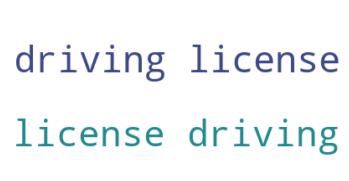

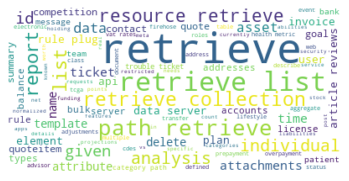

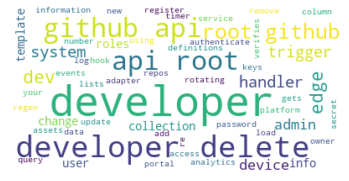

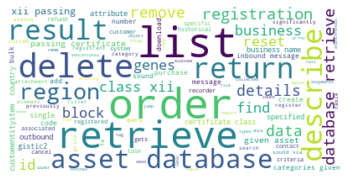

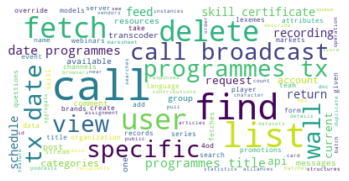

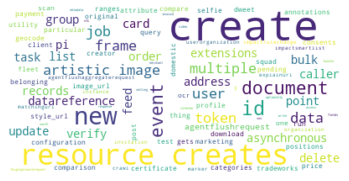

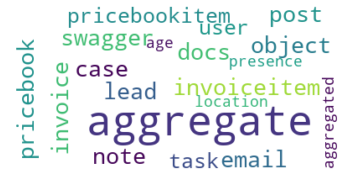

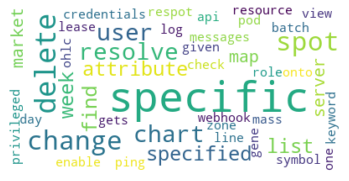

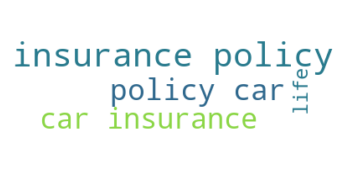

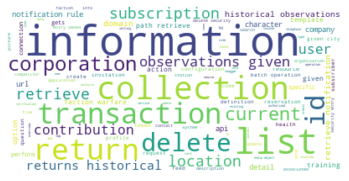

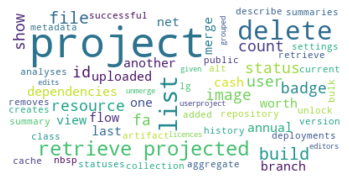

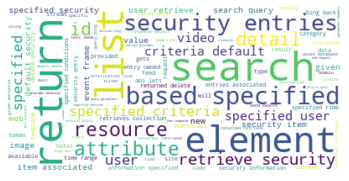

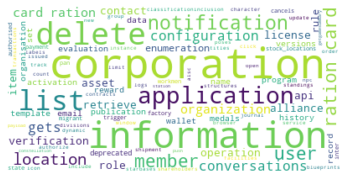

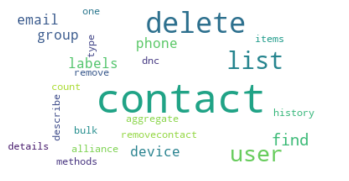

In [ ]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
k_val = 17
vectorizer = TfidfVectorizer(stop_words={'english'})
apilists = apis_df["api_summary"].to_list()
X = vectorizer.fit_transform(apilists)
clusters = list(kmeans.labels_)

kmeans_result={'cluster':clusters,'apis':apilists}
kmeans_result=pd.DataFrame(kmeans_result)
for k in range(0,k_val):
    s=kmeans_result[kmeans_result.cluster==k]
    text=s['apis'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [ ]:
kmeans_result

,cluster,apis
0,2,Get quotes for all symbols
1,2,Get a list of symbols for which we provide rea...
2,14,Performs introspection of the provided Bearer ...
3,4,Retrieve a list of API Requests that have been...
4,14,Enumerate all active channels of the application
...,...,...
3673,7,all
3674,2,single-audio
3675,2,single-text
3676,2,delete


In [ ]:
kmeans.labels_

array([2, 3, 4, ..., 4, 4, 2], dtype=int32)